In [1]:
import numpy as np
import pandas as pd
import datetime
from time import strftime
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
week_key = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']  # list containing all ther days

In [3]:
df=pd.read_csv('KaggleMay2016.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


In [5]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
#PatientId is an Integer and not Float. So,  converting it into int64.

df['PatientId']=df['PatientId'].astype('int64')

In [7]:
#Data Type of ScheduledDay and AppointmentDay is being changed to datetime.


df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')


In [8]:
#Typo's in the Column names will be corrected

df=df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMSReceived       110527 non-null int64
NoShow            110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 10.5+ MB


In [10]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
print('Feature in dataframe : {} '.format(df.columns.ravel()))

Feature in dataframe : ['PatientId' 'AppointmentID' 'Gender' 'ScheduledDay' 'AppointmentDay' 'Age'
 'Neighbourhood' 'Scholarship' 'Hypertension' 'Diabetes' 'Alcoholism'
 'Handicap' 'SMSReceived' 'NoShow'] 


In [12]:
# Drop 'PatientId' and 'AppointmentID' as they are just some system genrated numbers
df=df.drop(['PatientId','AppointmentID'],1)

In [13]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [14]:
df['Scholarship'].unique()

array([0, 1], dtype=int64)

In [15]:
df['Hypertension'].unique()

array([1, 0], dtype=int64)

In [16]:
df['Diabetes'].unique()

array([0, 1], dtype=int64)

In [17]:
df['Alcoholism'].unique()

array([0, 1], dtype=int64)

In [18]:
df['Handicap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [19]:
df['SMSReceived'].unique()

array([0, 1], dtype=int64)

In [20]:
for i in ('Scholarship','Hypertension','Diabetes','Alcoholism','Handicap','SMSReceived'):
    df[i]=df[i].astype('object')

In [21]:
df.sample(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
3121,F,2016-04-27,2016-04-29,51,JARDIM CAMBURI,0,0,0,0,0,0,No
84563,M,2016-06-03,2016-06-06,9,PRAIA DO SUÁ,1,0,0,0,0,0,No
55520,M,2016-04-28,2016-05-12,70,BONFIM,0,0,0,0,0,1,No
38726,M,2016-04-08,2016-05-02,37,SANTA TEREZA,0,0,0,0,0,1,No
82665,M,2016-05-11,2016-05-11,64,ITARARÉ,0,0,0,0,0,0,No


In [22]:
print(df['Age'].unique())

[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


In [23]:
#Checking age
print('Patient with age less than 1 {}'.format(df[df.Age==-1].shape[0]))
print('Patient with age 0 {}'.format(df[df.Age==0].shape[0]))


Patient with age less than 1 1
Patient with age 0 3539


In [24]:
#Deleting data that has age =-1

df = df[df.Age >= 0]

In [25]:
#Cheaking the property 
df[(df.Age <= 0) & ((df.Hypertension.astype(int)==1) | (df.Diabetes.astype(int) == 1) | (df.Alcoholism.astype(int) == 1))]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow


In [26]:
#Print Unique Values for 'ScheduledDay'
print("Unique Values in `ScheduledDay` => {}".format(np.sort(df.ScheduledDay.dt.strftime('%Y-%m-%d').unique())))

Unique Values in `ScheduledDay` => ['2015-11-10' '2015-12-03' '2015-12-07' '2015-12-08' '2015-12-14'
 '2015-12-15' '2016-01-04' '2016-01-05' '2016-01-07' '2016-01-11'
 '2016-01-13' '2016-01-14' '2016-01-19' '2016-01-20' '2016-01-21'
 '2016-01-22' '2016-01-25' '2016-01-26' '2016-01-27' '2016-01-28'
 '2016-01-29' '2016-02-01' '2016-02-02' '2016-02-03' '2016-02-04'
 '2016-02-05' '2016-02-11' '2016-02-12' '2016-02-15' '2016-02-16'
 '2016-02-17' '2016-02-18' '2016-02-19' '2016-02-22' '2016-02-23'
 '2016-02-24' '2016-02-25' '2016-02-26' '2016-02-29' '2016-03-01'
 '2016-03-02' '2016-03-03' '2016-03-04' '2016-03-05' '2016-03-07'
 '2016-03-08' '2016-03-09' '2016-03-10' '2016-03-11' '2016-03-14'
 '2016-03-15' '2016-03-16' '2016-03-17' '2016-03-18' '2016-03-19'
 '2016-03-21' '2016-03-22' '2016-03-23' '2016-03-28' '2016-03-29'
 '2016-03-30' '2016-03-31' '2016-04-01' '2016-04-05' '2016-04-06'
 '2016-04-07' '2016-04-08' '2016-04-09' '2016-04-11' '2016-04-12'
 '2016-04-13' '2016-04-14' '2016-04-15' '

In [27]:
print("Unique Values in `AppointmentDay` => {}".format(np.sort(df.AppointmentDay.dt.strftime('%Y-%m-%d').unique())))

Unique Values in `AppointmentDay` => ['2016-04-29' '2016-05-02' '2016-05-03' '2016-05-04' '2016-05-05'
 '2016-05-06' '2016-05-09' '2016-05-10' '2016-05-11' '2016-05-12'
 '2016-05-13' '2016-05-14' '2016-05-16' '2016-05-17' '2016-05-18'
 '2016-05-19' '2016-05-20' '2016-05-24' '2016-05-25' '2016-05-30'
 '2016-05-31' '2016-06-01' '2016-06-02' '2016-06-03' '2016-06-06'
 '2016-06-07' '2016-06-08']


In [28]:
print("Unique Values in `Neighbourhood` => {}".format(np.sort(df.Neighbourhood.unique())))

Unique Values in `Neighbourhood` => ['AEROPORTO' 'ANDORINHAS' 'ANTÔNIO HONÓRIO' 'ARIOVALDO FAVALESSA'
 'BARRO VERMELHO' 'BELA VISTA' 'BENTO FERREIRA' 'BOA VISTA' 'BONFIM'
 'CARATOÍRA' 'CENTRO' 'COMDUSA' 'CONQUISTA' 'CONSOLAÇÃO' 'CRUZAMENTO'
 'DA PENHA' 'DE LOURDES' 'DO CABRAL' 'DO MOSCOSO' 'DO QUADRO'
 'ENSEADA DO SUÁ' 'ESTRELINHA' 'FONTE GRANDE' 'FORTE SÃO JOÃO' 'FRADINHOS'
 'GOIABEIRAS' 'GRANDE VITÓRIA' 'GURIGICA' 'HORTO' 'ILHA DAS CAIEIRAS'
 'ILHA DE SANTA MARIA' 'ILHA DO BOI' 'ILHA DO FRADE' 'ILHA DO PRÍNCIPE'
 'ILHAS OCEÂNICAS DE TRINDADE' 'INHANGUETÁ' 'ITARARÉ' 'JABOUR'
 'JARDIM CAMBURI' 'JARDIM DA PENHA' 'JESUS DE NAZARETH' 'JOANA D´ARC'
 'JUCUTUQUARA' 'MARIA ORTIZ' 'MARUÍPE' 'MATA DA PRAIA' 'MONTE BELO'
 'MORADA DE CAMBURI' 'MÁRIO CYPRESTE' 'NAZARETH' 'NOVA PALESTINA'
 'PARQUE INDUSTRIAL' 'PARQUE MOSCOSO' 'PIEDADE' 'PONTAL DE CAMBURI'
 'PRAIA DO CANTO' 'PRAIA DO SUÁ' 'REDENÇÃO' 'REPÚBLICA' 'RESISTÊNCIA'
 'ROMÃO' 'SANTA CECÍLIA' 'SANTA CLARA' 'SANTA HELENA' 'SANTA LUÍZA'
 'SANTA

In [29]:
# Get Day of the Week for ScheduledDay 
df['ScheduledDay_DOW'] = df['ScheduledDay'].dt.weekday_name

In [30]:
#AppointmentDay ---------------
df['AppointmentDay_DOW'] = df['AppointmentDay'].dt.weekday_name

In [31]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledDay_DOW,AppointmentDay_DOW
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday


In [32]:
df['AppointmentDay'] = np.where((df['AppointmentDay'] - df['ScheduledDay']).dt.days < 0, df['ScheduledDay'], df['AppointmentDay'])


In [33]:
#wait time ------------
df['Waiting_Time_days'] = df['AppointmentDay'] - df['ScheduledDay']


In [34]:
df['Waiting_Time_days'].sample(3)

88419    0 days
29430    5 days
50706   22 days
Name: Waiting_Time_days, dtype: timedelta64[ns]

In [35]:
df['Waiting_Time_days'] = df['Waiting_Time_days'].dt.days

In [36]:
df['Waiting_Time_days'].sample(3)

63754     3
97508    13
96160     0
Name: Waiting_Time_days, dtype: int64

In [37]:
# wait time less than 0

print("There are [{}] records where the Waiting Time is less than Zero.".format(df[df.Waiting_Time_days < 0].shape[0]))

There are [0] records where the Waiting Time is less than Zero.


In [38]:
df.sample(n=10)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledDay_DOW,AppointmentDay_DOW,Waiting_Time_days
81518,M,2016-04-26,2016-05-12,67,JABOUR,0,0,0,0,0,1,No,Tuesday,Thursday,16
40294,F,2016-04-14,2016-05-31,78,JOANA D´ARC,0,0,0,0,0,1,No,Thursday,Tuesday,47
93829,F,2016-05-02,2016-06-02,41,SÃO CRISTÓVÃO,0,0,0,0,0,1,No,Monday,Thursday,31
94556,M,2016-06-02,2016-06-03,1,DA PENHA,0,0,0,0,0,0,No,Thursday,Friday,1
40385,F,2016-03-22,2016-05-04,24,JOANA D´ARC,0,0,0,0,0,1,No,Tuesday,Wednesday,43
97299,M,2016-05-31,2016-06-01,27,SANTA CECÍLIA,0,0,0,0,0,0,No,Tuesday,Wednesday,1
102199,F,2016-05-19,2016-06-01,20,ROMÃO,0,0,0,0,0,1,Yes,Thursday,Wednesday,13
19969,F,2016-05-05,2016-05-05,75,SANTA TEREZA,0,1,0,0,0,0,No,Thursday,Thursday,0
62211,F,2016-04-28,2016-05-25,66,MARIA ORTIZ,1,0,0,0,0,1,No,Thursday,Wednesday,27
109686,F,2016-06-02,2016-06-07,49,BELA VISTA,0,1,1,0,0,0,No,Thursday,Tuesday,5


In [39]:
# get size --- same as df['NoShow'].value_counts()
print("NoShow and Show Count of Patients\n")
print(df.groupby(['NoShow']).size())

NoShow and Show Count of Patients

NoShow
No     88207
Yes    22319
dtype: int64


In [40]:
# find percent of people to show up 

print("\nNoShow and Show '%' of Patients\n")
show = df.groupby(['NoShow']).size()[0]/(df.groupby(['NoShow']).size()[0]+df.groupby(['NoShow']).size()[1])


NoShow and Show '%' of Patients



In [41]:
print("\nNoShow and Show '%' of Patients\n")
show = df.groupby(['NoShow']).size()[0]/(df.groupby(['NoShow']).size()[0]+df.groupby(['NoShow']).size()[1])
print("Percent of Patients who `Showed Up` => {:.2f}%".format(show*100))


NoShow and Show '%' of Patients

Percent of Patients who `Showed Up` => 79.81%


In [42]:
noshow = df.groupby(['NoShow']).size()[1]/(df.groupby(['NoShow']).size()[0]+df.groupby(['NoShow']).size()[1])
print("Percent of Patients who Did `Not Showed Up` => {:.2f}%".format(noshow*100))

Percent of Patients who Did `Not Showed Up` => 20.19%


# part of vizualization using seaborn

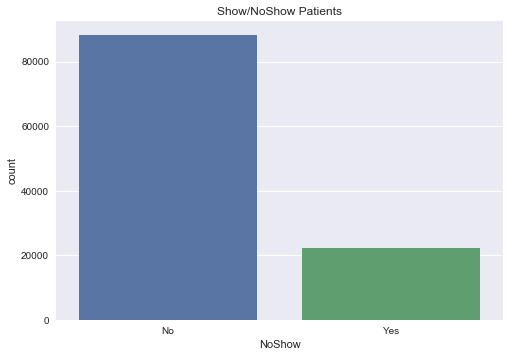

In [43]:
ax= sns.countplot(x=df.NoShow,data=df)
ax.set_title('Show/NoShow Patients')
plt.show()

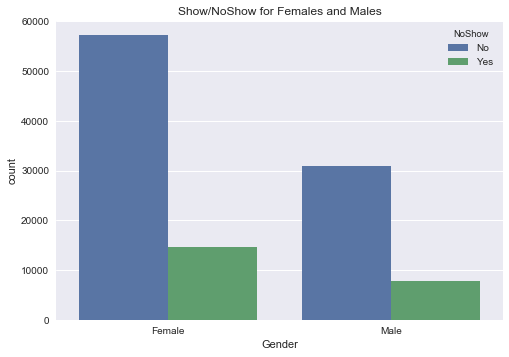

In [44]:
# Gender 

ax=sns.countplot(x=df.Gender,hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Females and Males")
x_tricks_labels=['Female','Male']
ax.set_xticklabels(x_tricks_labels)
plt.show()

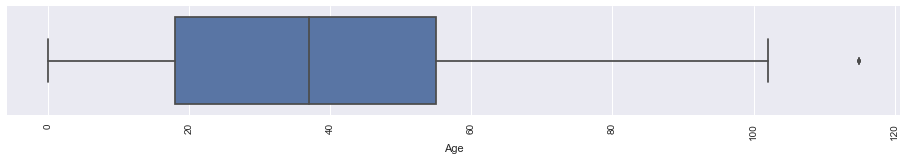

In [45]:
#Age -----------
#We will draw box plot for age

plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
_ =sns.boxplot(x=df.Age)


From the above BoxPlot we can see that the Median Age is around 30 and the IQR is between 18 and 55. Though the BoxPlot shows few datapoints as outliers we will not consider them as true outliers for this case.

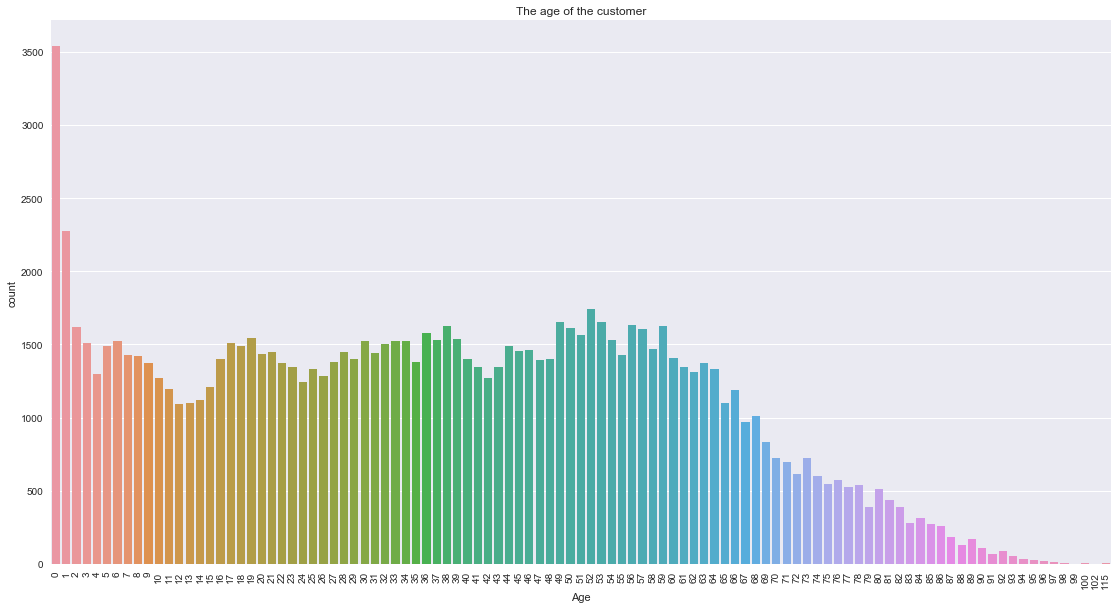

In [46]:
# plotting age of people

plt.figure(figsize=(19,10))
plt.xticks(rotation =90)
ax= sns.countplot(x=df.Age)
ax.set_title("The age of the customer")
plt.show()



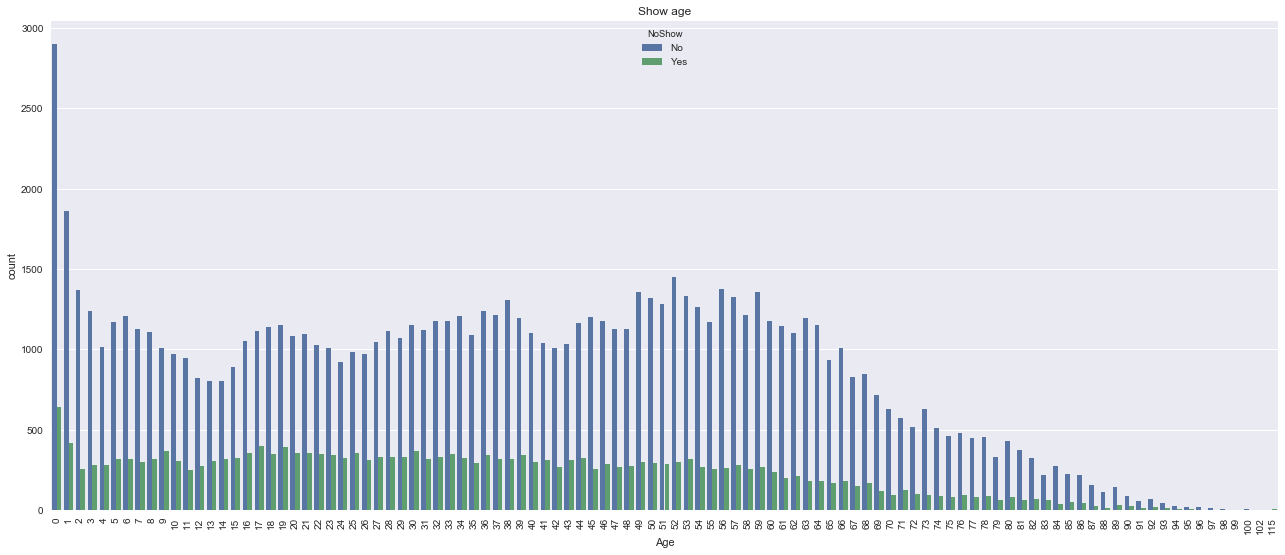

In [47]:
# Now checking Show /No Show
plt.figure(figsize=(22,9))
plt.xticks(rotation=90)
ax=sns.countplot(x=df.Age , hue= df.NoShow)
ax.set_title("Show age")
plt.show()

In [48]:
# Checking Age 
df_age_ratio= df[df.NoShow== 'No'].groupby(['Age']).size()/df.groupby(['Age']).size()


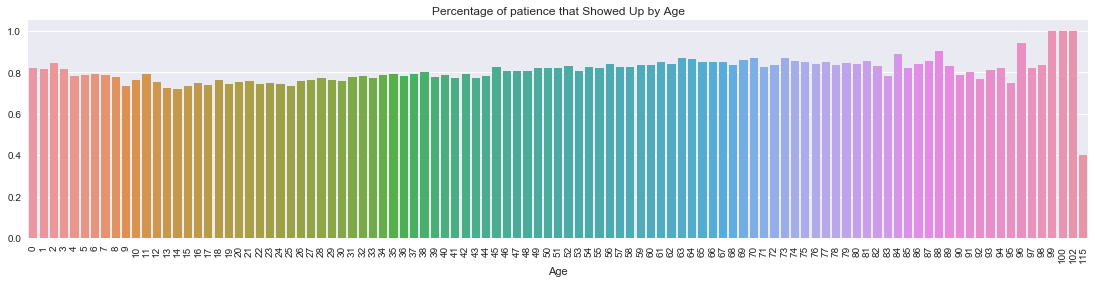

In [49]:
plt.figure(figsize=(19,4))
plt.xticks(rotation=90)
ax=sns.barplot(x=df_age_ratio.index,y= df_age_ratio)
ax.set_title("Percentage of patience that Showed Up by Age")
plt.show()


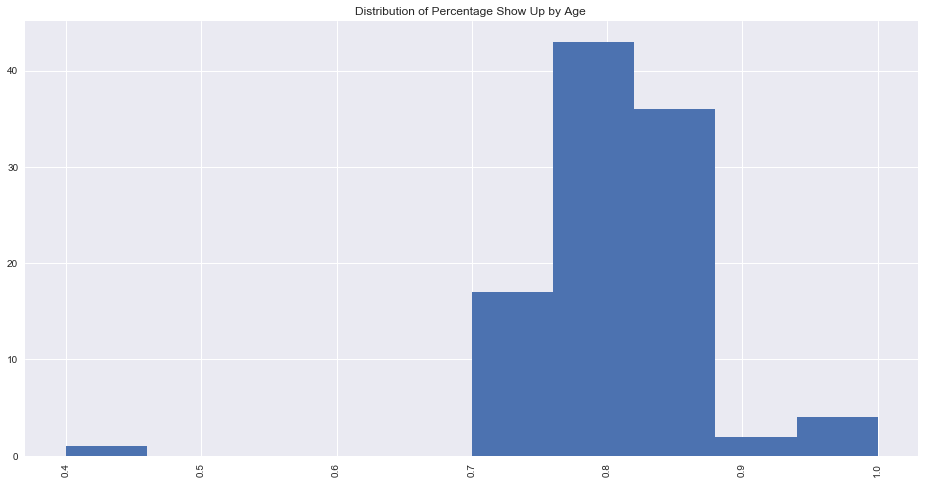

In [50]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
ax=plt.hist(df_age_ratio)
plt.title("Distribution of Percentage Show Up by Age ")
plt.show()

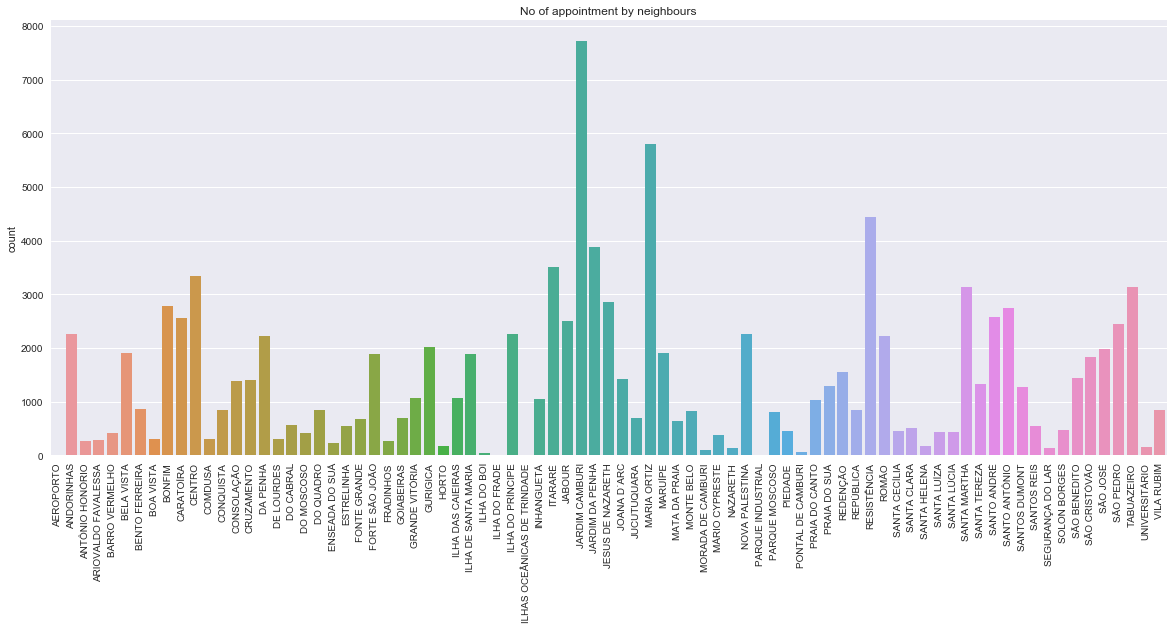

In [51]:
# Now checking the neighbourhood

plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
ax=sns.countplot(x=np.sort(df.Neighbourhood))
ax.set_title("No of appointment by neighbours")
plt.show()

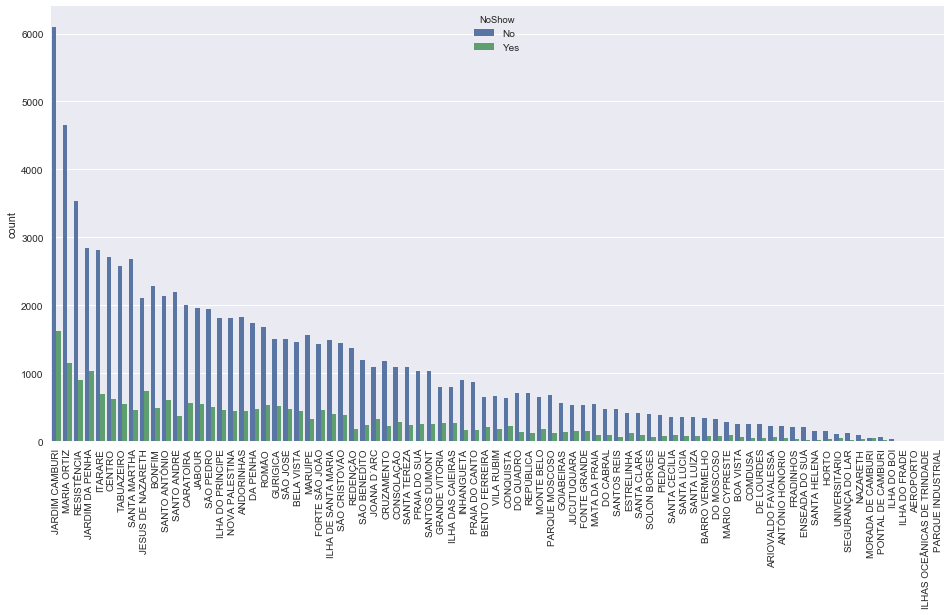

In [52]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
ax=sns.countplot(x=np.sort(df.Neighbourhood), hue=df.NoShow, order=df.Neighbourhood.value_counts().index)
plt.show()

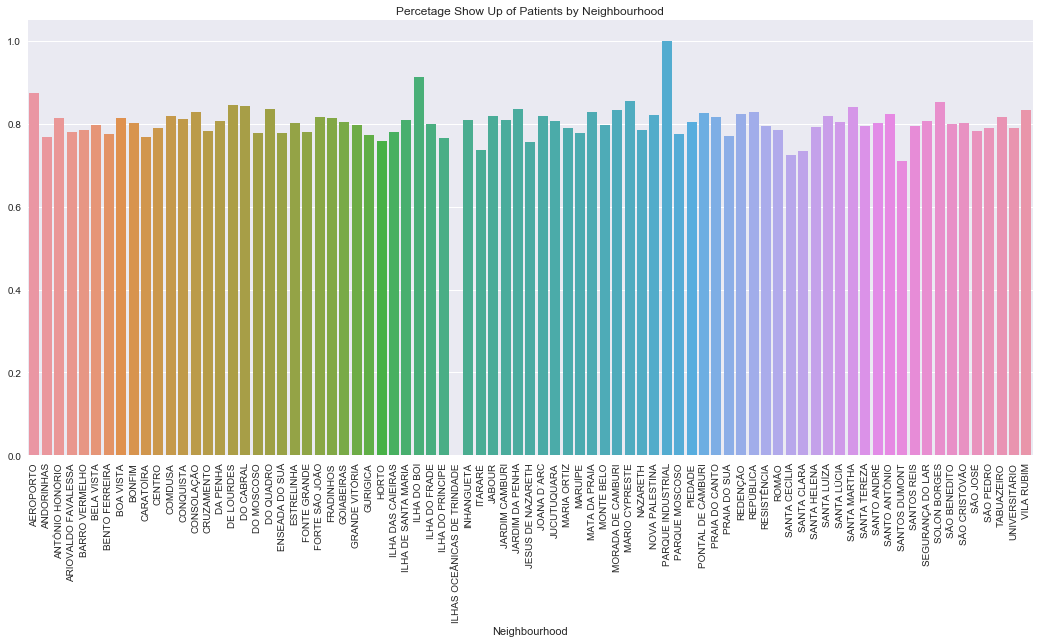

In [53]:
# checking the ratio of the showup 
df_n_ratio = df[df.NoShow == 'No'].groupby(['Neighbourhood']).size()/df.groupby(['Neighbourhood']).size()

plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
ax= sns.barplot(x=df_n_ratio.index,y=df_n_ratio)
ax.set_title("Percetage Show Up of Patients by Neighbourhood")
plt.show()

As most of the Neighbourhood have around 80% Show rate, this feature may not add much value while building a model to help us determine which segment of patients are tuning up for a visit the most.

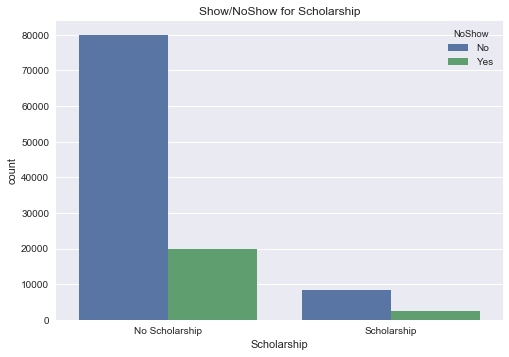

In [54]:
#Scholarship

ax=sns.countplot(x=df.Scholarship, hue=df.NoShow,data=df)
ax.set_title("Show/NoShow for Scholarship")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [55]:
df_s_ratio=df[df.NoShow=='No'].groupby(['Scholarship']).size()/df.groupby(['Scholarship']).size()

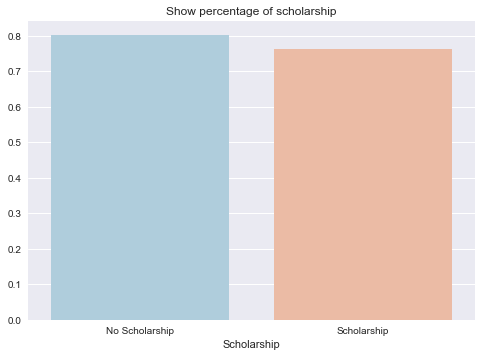

In [56]:
ax=sns.barplot(x=df_s_ratio.index, y=df_s_ratio,palette="RdBu_r")
ax.set_title("Show percentage of scholarship")
ax.set_xticklabels(x_ticks_labels)
plt.show()

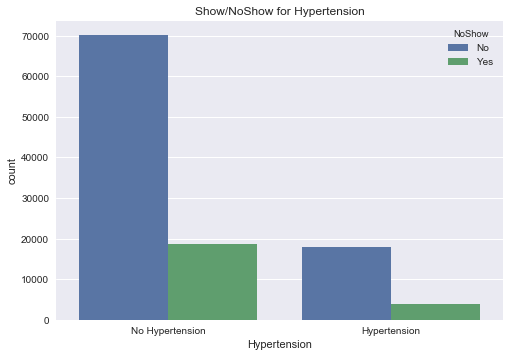

In [57]:
#Hypertension
ax=sns.countplot(x=df.Hypertension, hue=df.NoShow,data=df)
ax.set_title("Show/NoShow for Hypertension")
x_ticks_labels=['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()



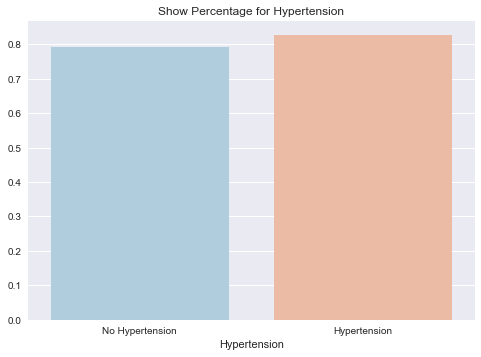

In [58]:
df_h_ratio = df[df.NoShow == 'No'].groupby(['Hypertension']).size()/df.groupby(['Hypertension']).size()
ax = sns.barplot(x=df_h_ratio.index, y=df_h_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for Hypertension")
x_ticks_labels=['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

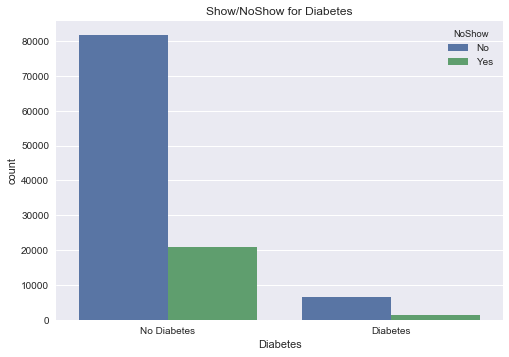

In [59]:
ax = sns.countplot(x=df.Diabetes, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Diabetes")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

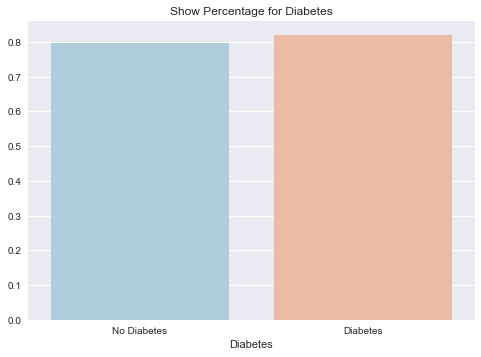

In [60]:
df_d_ratio = df[df.NoShow == 'No'].groupby(['Diabetes']).size()/df.groupby(['Diabetes']).size()
ax = sns.barplot(x=df_d_ratio.index, y=df_d_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for Diabetes")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

From the above visualization we can see that there are around 102,000 patients without Diabetes and out of them around 80% have come for the visit.
Out of the 8,500 patients with Diabetes around 83% of them have come for the visit.
So, Diabetes feature could help us in determining if a patient will turn up for the visit after an appointment.

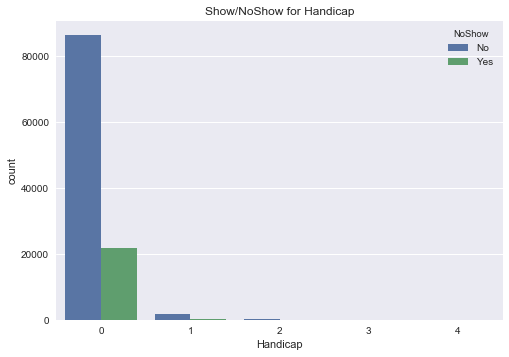

In [61]:
# Handicap
ax=sns.countplot(x=df.Handicap,hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Handicap")
plt.show()

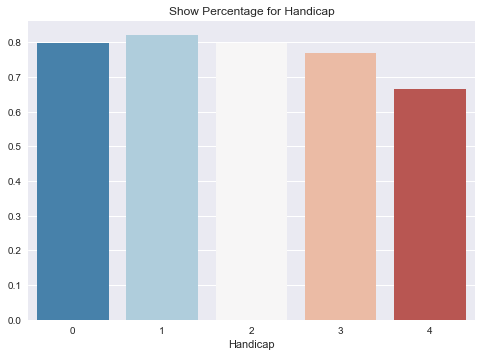

In [62]:
df_ha_ratio = df[df.NoShow == 'No'].groupby(['Handicap']).size()/df.groupby(['Handicap']).size()
ax = sns.barplot(x=df_ha_ratio.index, y=df_ha_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for Handicap")
plt.show()

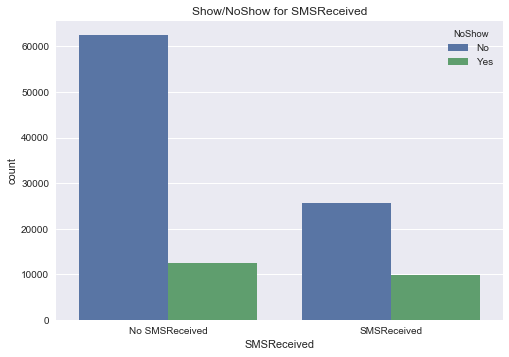

In [63]:
ax = sns.countplot(x=df.SMSReceived, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for SMSReceived")
x_ticks_labels=['No SMSReceived', 'SMSReceived']
ax.set_xticklabels(x_ticks_labels)
plt.show()

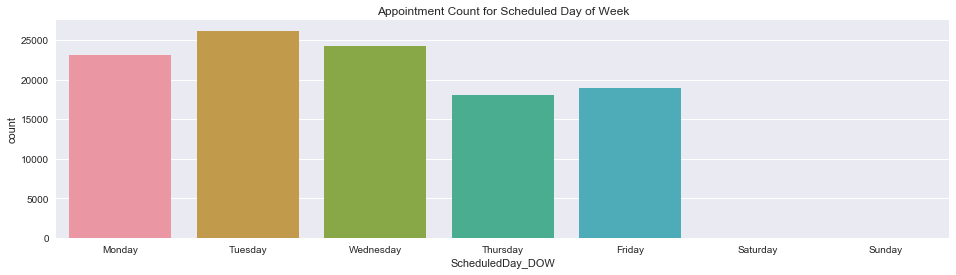

In [64]:
#ScheduledDay_DOW . checking day

plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.ScheduledDay_DOW, order=week_key)
ax.set_title("Appointment Count for Scheduled Day of Week")
plt.show()

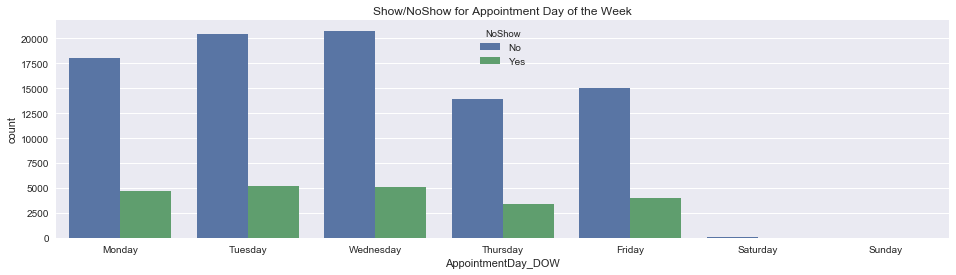

In [65]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.AppointmentDay_DOW, hue=df.NoShow, order=week_key)
ax.set_title("Show/NoShow for Appointment Day of the Week")
plt.show()

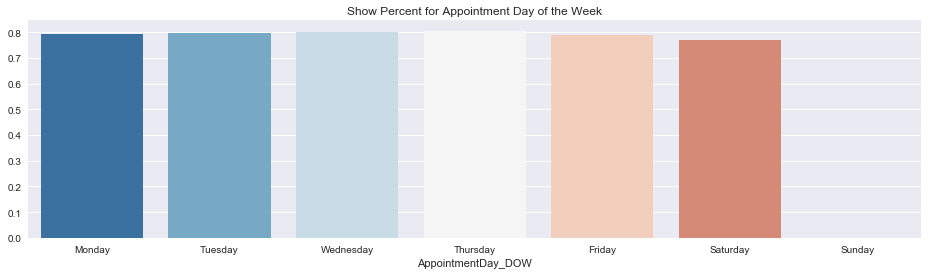

In [66]:
df_a_dow_ratio = df[df.NoShow == 'No'].groupby(['AppointmentDay_DOW']).size()/df.groupby(['AppointmentDay_DOW']).size()
plt.figure(figsize=(16,4))
ax = sns.barplot(x=df_a_dow_ratio.index, y=df_a_dow_ratio, order=week_key, palette="RdBu_r")
ax.set_title("Show Percent for Appointment Day of the Week")
plt.show()

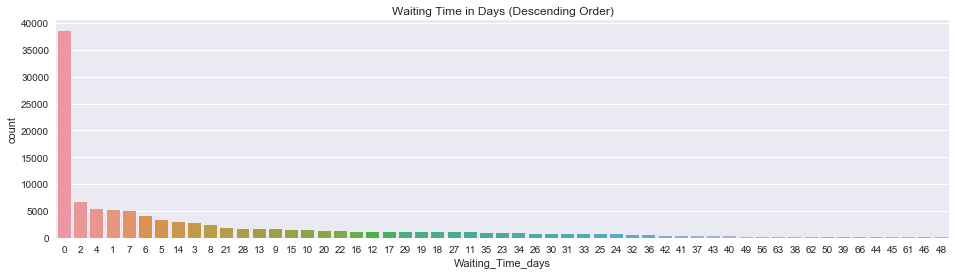

In [67]:
#Waiting_Time

plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.Waiting_Time_days, order=df.Waiting_Time_days.value_counts().iloc[:55].index)
ax.set_title("Waiting Time in Days (Descending Order)")
plt.show()

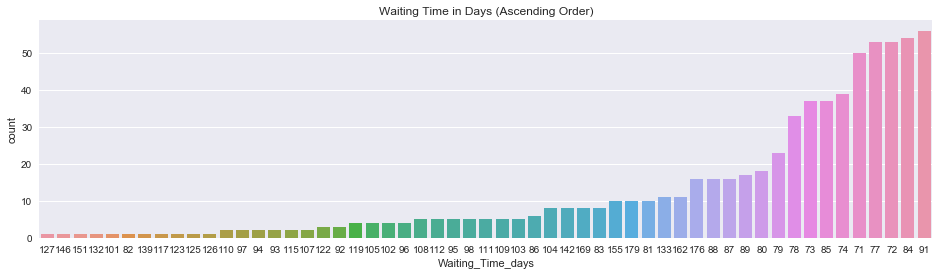

In [68]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.Waiting_Time_days, order=df.Waiting_Time_days.value_counts(ascending=True).iloc[:55].index)
ax.set_title("Waiting Time in Days (Ascending Order)")
plt.show()

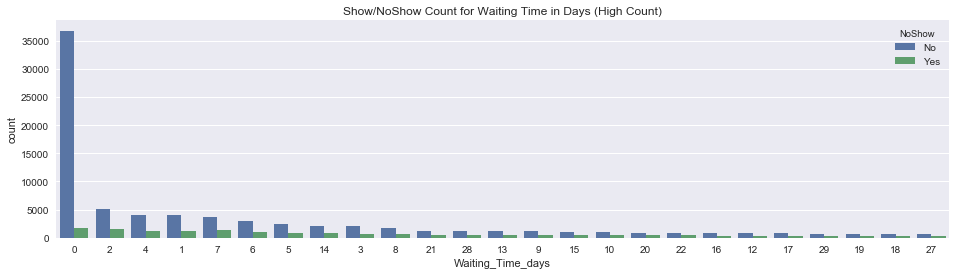

In [69]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.Waiting_Time_days, hue=df.NoShow, order=df.Waiting_Time_days.value_counts().iloc[:25].index)
ax.set_title("Show/NoShow Count for Waiting Time in Days (High Count)")
plt.show()

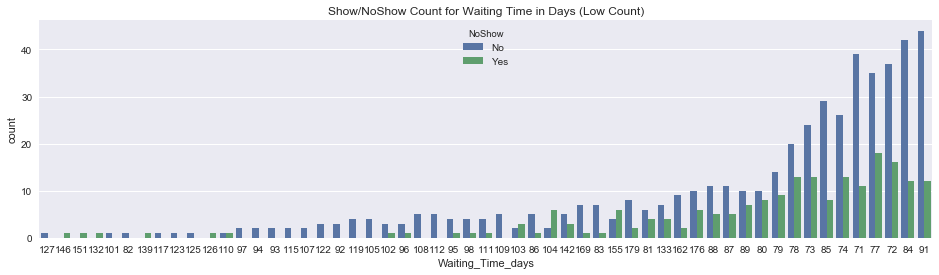

In [70]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.Waiting_Time_days, hue=df.NoShow, order=df.Waiting_Time_days.value_counts(ascending=True).iloc[:55].index)
ax.set_title("Show/NoShow Count for Waiting Time in Days (Low Count)")
plt.show()

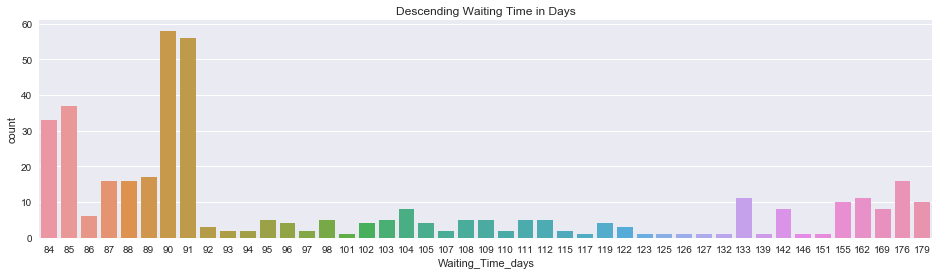

In [71]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df[['Waiting_Time_days']].sort_values('Waiting_Time_days', ascending=False).Waiting_Time_days.iloc[:400])
ax.set_title("Descending Waiting Time in Days")
plt.show()

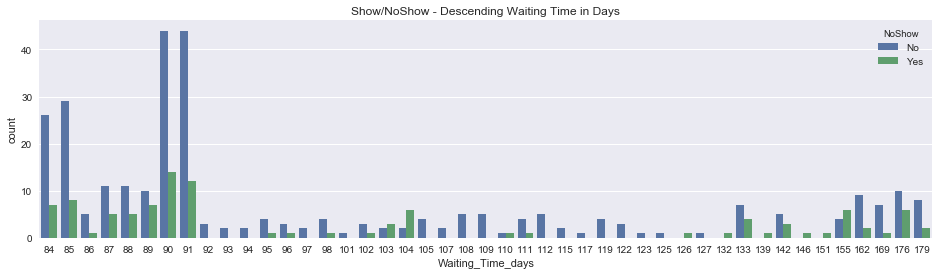

In [72]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df[['Waiting_Time_days']].sort_values('Waiting_Time_days', ascending=False).Waiting_Time_days.iloc[:400], hue=df.NoShow)
ax.set_title("Show/NoShow - Descending Waiting Time in Days")
plt.show()

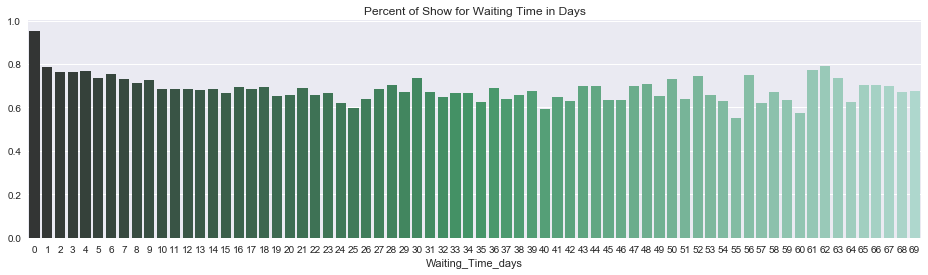

In [73]:
df_w_ratio = df[df.NoShow == 'No'].groupby(['Waiting_Time_days']).size()/df.groupby(['Waiting_Time_days']).size()

plt.figure(figsize=(16,4))
ax = sns.barplot(x=df_w_ratio.index, y=df_w_ratio, order=df.Waiting_Time_days.iloc[:70].index, palette="BuGn_d")
ax.set_title("Percent of Show for Waiting Time in Days")
plt.show()

From the above visualization we can see that around 95% of the patients who have booked their
appointments on the same day and visiting the hospital without fail. Also close to 80% of the 
patients are visiting the hospital if they had booked their appointments just before 4 days.

# Model Building

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
Gender                110526 non-null object
ScheduledDay          110526 non-null datetime64[ns]
AppointmentDay        110526 non-null datetime64[ns]
Age                   110526 non-null int64
Neighbourhood         110526 non-null object
Scholarship           110526 non-null object
Hypertension          110526 non-null object
Diabetes              110526 non-null object
Alcoholism            110526 non-null object
Handicap              110526 non-null object
SMSReceived           110526 non-null object
NoShow                110526 non-null object
ScheduledDay_DOW      110526 non-null object
AppointmentDay_DOW    110526 non-null object
Waiting_Time_days     110526 non-null int64
dtypes: datetime64[ns](2), int64(2), object(11)
memory usage: 12.9+ MB


In [75]:
# Applying LabelEncoder` to encode labels with value between 0 and n_classes-1  ------------------


le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
#Neighbourhood
le=LabelEncoder()
df['Neighbourhood']=le.fit_transform(df['Neighbourhood'])
le = LabelEncoder()
df['ScheduledDay_DOW'] = le.fit_transform(df['ScheduledDay_DOW'])
#AppointmentDay_DOW
le = LabelEncoder()
df['AppointmentDay_DOW'] = le.fit_transform(df['AppointmentDay_DOW'])
print("LabelEncoder Completed")



le=LabelEncoder()
df['NoShow']=le.fit_transform(df['NoShow'])

LabelEncoder Completed


In [76]:
df['ScheduledDay_Y'] = df['ScheduledDay'].dt.year
df['ScheduledDay_M'] = df['ScheduledDay'].dt.month
df['ScheduledDay_D'] = df['ScheduledDay'].dt.day
df.drop(['ScheduledDay'], axis=1, inplace=True)

df['AppointmentDay_Y'] = df['AppointmentDay'].dt.year
df['AppointmentDay_M'] = df['AppointmentDay'].dt.month
df['AppointmentDay_D'] = df['AppointmentDay'].dt.day
df.drop(['AppointmentDay'], axis=1, inplace=True)

In [77]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledDay_DOW,AppointmentDay_DOW,Waiting_Time_days,ScheduledDay_Y,ScheduledDay_M,ScheduledDay_D,AppointmentDay_Y,AppointmentDay_M,AppointmentDay_D
0,0,62,39,0,1,0,0,0,0,0,0,0,0,2016,4,29,2016,4,29
1,1,56,39,0,0,0,0,0,0,0,0,0,0,2016,4,29,2016,4,29
2,0,62,45,0,0,0,0,0,0,0,0,0,0,2016,4,29,2016,4,29
3,0,8,54,0,0,0,0,0,0,0,0,0,0,2016,4,29,2016,4,29
4,0,56,39,0,1,1,0,0,0,0,0,0,0,2016,4,29,2016,4,29


In [78]:
X=df.drop(['NoShow'], axis =1)
y=df['NoShow']

In [79]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size= .33, random_state=0)

In [80]:
df_cl=DecisionTreeClassifier(random_state=0)
df_cl.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [83]:
print("Feature Importance:\n")
for name, importance in zip(X.columns, np.sort(df_cl.feature_importances_)[::-1]):
    print("{} -- {:.2f}".format(name, importance))

Feature Importance:

Gender -- 0.23
Age -- 0.23
Neighbourhood -- 0.17
Scholarship -- 0.08
Hypertension -- 0.07
Diabetes -- 0.05
Alcoholism -- 0.05
Handicap -- 0.04
SMSReceived -- 0.02
ScheduledDay_DOW -- 0.02
AppointmentDay_DOW -- 0.01
Waiting_Time_days -- 0.01
ScheduledDay_Y -- 0.01
ScheduledDay_M -- 0.01
ScheduledDay_D -- 0.01
AppointmentDay_Y -- 0.01
AppointmentDay_M -- 0.00
AppointmentDay_D -- 0.00


In [85]:
df_cl.score(X_test, y_test)

0.72341942205406595

In [87]:
#GridSearchCV


In [88]:
params={'n_estimators':[10,20], 'max_depth':[None, 5], 'min_samples_split':[2,3]}
rf_clf = RandomForestClassifier(random_state=0)
clf_grid = GridSearchCV(rf_clf, params, cv=5, n_jobs=-1, verbose=1)
clf_grid.fit(X, y)
print(clf_grid.best_params_)
print(clf_grid.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   44.6s finished


{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 10}
0.798065613521


From the above Model Score we can see that we are doing almost similar to the naive predictor. Also, as we have imbalanced 
classes, we should ideally use different metric like F1-Score rather than Accuracy.

## Conclusion
From the above feature importance, we could see that Gender, Age, Neighbourhood, Scholarship and Hypertension are some of 
the top features that would help us determine if the patient who has taken an appointment will Show/NoShow.